<a href="https://colab.research.google.com/github/bernaldiaz/bernaldiaz/blob/main/LTI_VS_LTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

Este es el programa LTI_VS_LTV del curso Vehicle suspension contro 1 de Udemi

In [2]:
### USER INPUTS ###

dt=0.001 # simulation time increment
t = np.arange(0,30+dt,dt) # simulation length
tau=5 # only applied to the 2nd ODE
linear=True # applied to both at once
LTI_eq_1=True # if false, LTV (or nonlinear Time-Variant, if linear is set to false)
LTI_eq_2=True # if false, LTV (or nonlinear Time-Variant, if linear is set to false)

### END OF USER INPUTS ###

In [3]:
### AUTOMATIC SETTING OF THE PARAMETERS FOR ODE-s ###
if linear == True:
    p=1
else:
    p=3

if LTI_eq_1==True:
    m_1=2*np.ones(len(t))
    m1=r', $m= 2$'
else:
    m_1=1+2/(t+2)
    m1=r', $m= (1+\frac{2}{t + 2})$'

if LTI_eq_2==True:
    m_2=2*np.ones(len(t))
    m2=r', $m= 2$'
else:
    m_2=1+2/(t+2)
    m2=r', $m= (1+\frac{2}{t + 2})$'

### END OF PARAMETER SETTING ###

In [4]:
### SIMULATE THE 1st ODE ###

# Define 0 arrays for all the states
X1=np.zeros(len(t)) # x(t)
X2=np.zeros(len(t)) # x_dot(t)

# Start the Euler simulation
for i in range(len(t)):
    if i > 0:

        # Compute the time derivatives
        x1_dot= X2[i-1]
        x2_dot= -2/m_1[i]*X1[i-1]-1/m_1[i]*X2[i-1]**p

        # Update the states
        X1[i]=X1[i-1]+dt*x1_dot
        X2[i]=X2[i-1]+dt*x2_dot

    elif i==0:
        x1_dot= 0
        x2_dot= -2/m_1[i]*X1[i]-1/m_1[i]*X2[i]**p+1/(dt*m_1[i])
        # The last term (for dirac delta) has a dt in the denominator, which will cancel out in the
        # state update equation: X2[i]=X2[i]+dt*x2_dot. That will automatically modify my velocity at the time of the impulse.

        X1[i]=X1[i]+dt*x1_dot
        X2[i]=X2[i]+dt*x2_dot

# Demonstrate the result without the shift

# for i in range(len(t)):
#     if i < int(tau/dt):
#         X1[i]=0
#         X2[i]=0

In [5]:
### SIMULATE THE 2nd ODE ###

# Define 0 arrays for all the states
X3=np.zeros(len(t)) # x(t)
X4=np.zeros(len(t)) # x_dot(t)

# Start the Euler simulation
for i in range(len(t)):
    if i > int(tau/dt):

        # Compute the time derivatives
        x3_dot= X4[i-1]
        x4_dot= -2/m_2[i]*X3[i-1]-1/m_2[i]*X4[i-1]**p

        # Update the states
        X3[i]=X3[i-1]+dt*x3_dot
        X4[i]=X4[i-1]+dt*x4_dot

    elif i==int(tau/dt):
        x3_dot= 0
        x4_dot= -2/m_2[i]*X3[i]-1/m_2[i]*X4[i]**p+1/(dt*m_2[i])
        # The last term (for dirac delta) has a dt in the denominator, which will cancel out in the
        # state update equation: X2[i]=X2[i]+dt*x2_dot. That will automatically modify my velocity at the time of the impulse.

        X3[i]=X3[i]+dt*x3_dot
        X4[i]=X4[i]+dt*x4_dot

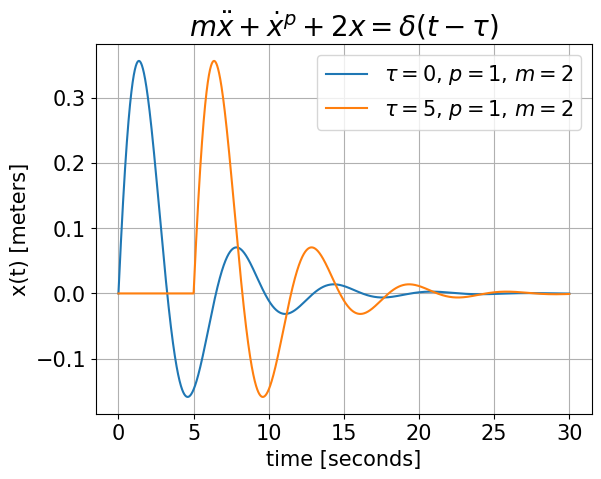

In [6]:
### Plot the results ###

plt.plot(t,X1)
plt.plot(t,X3)
plt.title(r'$m \ddot{x} + \dot{x}^p + 2x = \delta(t - \tau)$',fontsize=20)
plt.xlabel('time [seconds]',fontsize=15)
plt.ylabel('x(t) [meters]',fontsize=15)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend([r'$\tau = 0$'+r', $p= $'+str(p)+m1, r'$\tau = $'+str(tau)+r', $p= $'+str(p)+m2],loc='upper right',fontsize=15)
plt.show()

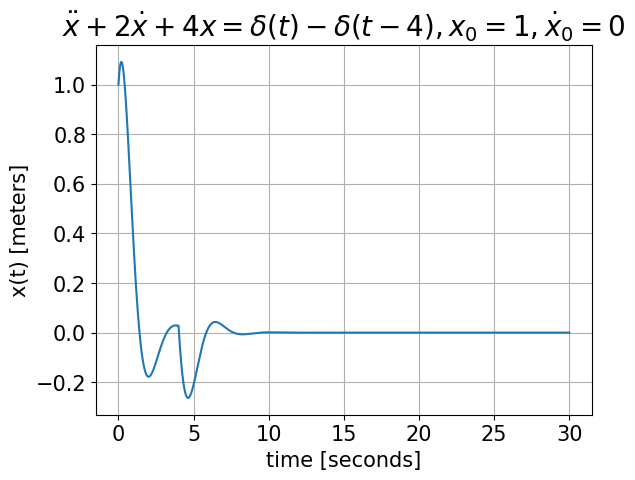

In [7]:
# Simulate the double impulse case
x_double=np.exp(-t)*np.cos(3**0.5*t) + 2/3**0.5*np.exp(-t)*np.sin(3**0.5*t) - np.heaviside(t - 4, 0)*1/3**0.5*np.exp(-(t-4))*np.sin(3**0.5*(t-4))

### Plot the results ###

plt.plot(t,x_double)
plt.title(r'$\ddot{x} + 2\dot{x} + 4x = \delta(t) - \delta(t - 4), x_0 = 1, \dot{x}_0 = 0$',fontsize=20)
plt.xlabel('time [seconds]',fontsize=15)
plt.ylabel('x(t) [meters]',fontsize=15)
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()